In [2]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

2024-04-24 19:08:08.968305: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Estilos

In [14]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

font_leg = {'family' : 'DejaVu Sans',
            'weight' : 'bold',
            'size'   : 10}

## <center><h2>Elementos de una red neuronal</h2></center>

Ya se ha visto la estructura básica de una red neuronal. Vimos que una neurona realiza una suma ponderada y sobre esta aplica una función de activación que será el valor de salida de la neurona, luego, una vez se han obtenido las predicciones de la red para los datos de entrenamiento, se puede calcular la función de costo que será el objetivo a minimizar por medio del ajuste de los pesos en cada época del entrenamiento. Este ajuste se realiza por medio de algún algoritmo de minimización y, en esencia, todos hacen uso del gradiente de la función de costo. Para calcular este gradiente se debe utilizar un algoritmo muy especial conocido como *El Algoritmo de Backpropagation*. En este notebook se analizarán en mayor detalle cada una de estas componentes del proceso de entrenamiento de la red neuronal. 

## Funciones de activación

Una neurona tendrá un determinado número de entradas $x_i$, cada una de ellas un escalar, e internamente realizará una suma ponderada $z=\sum w_ix_i+b$ de estas, luego la suma es entregada a una función de activación $a(z)$ y este será el valor de salida de la neurona. 

Por ejemplo, en el caso del perceptrón propuesto por [Frank Rosenblatt](https://es.wikipedia.org/wiki/Perceptr%C3%B3n), la función de activación es la función escalón unitario, pero tenemos gran variedad de funciones de activación, por ejemplo, keras nos ofrece las siguientes:

<p><center>relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential, leaky_relu, relu6, silu, hard_silu, gelu, hard_sigmoid, linear, mish, log_softmax.</center></p>

aunque también nos permite definir las nuestras propias. A continuación vamos a comenzar por analizar algunas de las funciones de activación más relevantes y su derivada pues esta es también de alta importancia para poder entender su uso. 

#### lineal
La función de activación más simple sería la función de activación lineal que es una función identidad, retorna lo mismo que le entra. Veamos su representación gráfica y la de su derivada. Pero antes, como estaremos graficando varias funciones de activación minimicemos código generando una función que haga esto.

In [37]:
def plot_af(x,
            af,
            daf,
            af_ylabel,
            daf_ylabel):
    
    # gráfico
    fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1)

    ax[0].plot(x, af(x), color="k", lw=2)
    ax[0].set_title("AF", **font)
    ax[0].set_ylabel(af_ylabel, **font)
    ax[0].set_xlim(min(x), max(x))

    ax[1].plot(x, daf(x), color="red", lw=2)
    ax[1].set_title("Derivative of the AF", **font)
    ax[1].set_ylabel(daf_ylabel, **font)
    ax[1].set_xlim(min(x), max(x))

    plt.tight_layout()

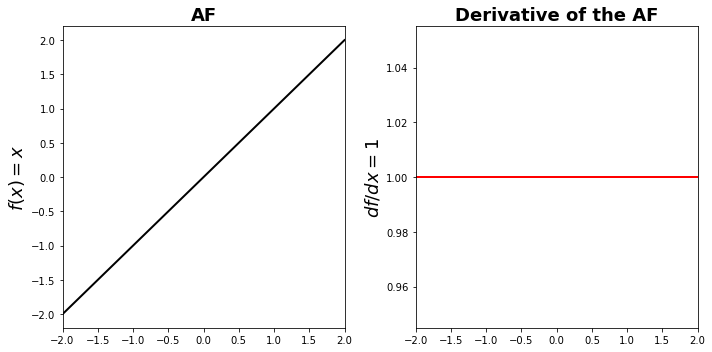

In [40]:
# derivada
x = np.linspace(-2, 2, 100)

def d_lineal(x):
    return 1
d_lineal = np.vectorize(d_lineal)

plot_af(x,
        af=keras.activations.linear,
        daf=d_lineal,
        af_ylabel=f"$f(x)=x$",
        daf_ylabel=f"$df/dx=1$")


In [34]:
# Algunos datos de prueba
np.random.seed(0)
xp = np.random.uniform(-10, 10, 10)
xp

array([ 0.97627008,  4.30378733,  2.05526752,  0.89766366, -1.52690401,
        2.91788226, -1.24825577,  7.83546002,  9.27325521, -2.33116962])

In [35]:
keras.activations.linear(xp)

array([ 0.97627008,  4.30378733,  2.05526752,  0.89766366, -1.52690401,
        2.91788226, -1.24825577,  7.83546002,  9.27325521, -2.33116962])

## Funciones de perdida

## Optimizadores

## Algoritmo de Backpropagation